In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
df1=pd.read_csv('/Fake_News.csv',encoding='windows-1252')

In [3]:
df1

,Headlines,Summary,Sources,Date,Fake/Real(1/0)
0,Bungalow with private island up for sale for ?...,"A bungalow with a private island, located off ...",Bloomberg,15-02-2017,0
1,Americans react to Bollywood song &# ;Pinga&# ;,A video by YouTube channel &# ;Fomo Daily&# ; ...,YouTube,02-08-2016,0
2,World Toilet Day is celebrated on November 19,The United Nations has designated November 19 ...,United Nations,19-11-2016,0
3,Over 1.57 lakh people affected by Assam floods,Over 1.57 lakh people reportedly have been aff...,Northeast Today,21-07-2016,0
4,Varun Gandhi unhurt after stage collapses,BJP MP Varun Gandhi on Sunday escaped unhurt a...,India Today,13-03-2016,0
...,...,...,...,...,...
56381,"Terrorism is like &# ;Bhasmasura&# ;, says Naidu",Union Minister Venkaiah Naidu on Saturday said...,ANI,29-10-2016,0
56382,Hyderabad blood spills over illicit affairs tw...,Hyderabad blood spills over illicit affairs tw...,The Times of India,03-03-2018,1
56383,PIL urges govt to form a land utilisation policy,A PIL has been filed in the Madras High Court ...,India Today,20-10-2016,0
56384,No 1 note likely to be dispensed through our A...,"After reports of &# ;churan lable&# ; ?2,000 n...",Facebook,22-02-2017,0


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df1.shape

(56386, 5)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56386 entries, 0 to 56385
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Headlines       56386 non-null  object
 1   Summary         56386 non-null  object
 2   Sources         56386 non-null  object
 3   Date            56386 non-null  object
 4   Fake/Real(1/0)  56386 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


DATA PRE-PROCESSING


In [7]:
#checking the missing value
df1.isnull().sum()

Headlines         0
Summary           0
Sources           0
Date              0
Fake/Real(1/0)    0
dtype: int64

In [8]:
#removing the date and summary column
df1.drop(['Date'],axis=1, inplace=True)
df1.drop(['Summary'],axis=1, inplace=True)
df1.head()

,Headlines,Sources,Fake/Real(1/0)
0,Bungalow with private island up for sale for ?...,Bloomberg,0
1,Americans react to Bollywood song &# ;Pinga&# ;,YouTube,0
2,World Toilet Day is celebrated on November 19,United Nations,0
3,Over 1.57 lakh people affected by Assam floods,Northeast Today,0
4,Varun Gandhi unhurt after stage collapses,India Today,0


In [9]:
#changing the name of Fake/Real(1/0) Fake=1, Real=0 to label
df1=df1.rename(columns={'Fake/Real(1/0)':'label'})
df1.head(5)

,Headlines,Sources,label
0,Bungalow with private island up for sale for ?...,Bloomberg,0
1,Americans react to Bollywood song &# ;Pinga&# ;,YouTube,0
2,World Toilet Day is celebrated on November 19,United Nations,0
3,Over 1.57 lakh people affected by Assam floods,Northeast Today,0
4,Varun Gandhi unhurt after stage collapses,India Today,0


In [10]:
#convert all letters to loercase in headlines
df1['Headlines']=df1['Headlines'].apply(lambda x: x.lower())
df1.head(5)

,Headlines,Sources,label
0,bungalow with private island up for sale for ?...,Bloomberg,0
1,americans react to bollywood song &# ;pinga&# ;,YouTube,0
2,world toilet day is celebrated on november 19,United Nations,0
3,over 1.57 lakh people affected by assam floods,Northeast Today,0
4,varun gandhi unhurt after stage collapses,India Today,0


In [11]:
#removing punctuations
import string
def punctuation_removal(text):
  list= [char for char in text if char not in string.punctuation]
  clean=''.join(list)
  return clean

df1['Headlines']=df1['Headlines'].apply(punctuation_removal)
df1.head(5)

,Headlines,Sources,label
0,bungalow with private island up for sale for 4...,Bloomberg,0
1,americans react to bollywood song pinga,YouTube,0
2,world toilet day is celebrated on november 19,United Nations,0
3,over 157 lakh people affected by assam floods,Northeast Today,0
4,varun gandhi unhurt after stage collapses,India Today,0


In [12]:
#removing the stopword from the data
from nltk.corpus import stopwords
stop=stopwords.words('english')
df1['Headlines']=df1['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
df1.head(5)

,Headlines,Sources,label
0,bungalow private island sale 46 crore,Bloomberg,0
1,americans react bollywood song pinga,YouTube,0
2,world toilet day celebrated november 19,United Nations,0
3,157 lakh people affected assam floods,Northeast Today,0
4,varun gandhi unhurt stage collapses,India Today,0


BASIC DATA EXPLORATION

Sources
 Twitter                  1
 i5 Summit                1
0 Madrid                  3
2016 Kabaddi World Cup    1
500 Startups              1
                         ..
the Guardian              9
top500                    1
unPack                    1
vivo.co.in                1
youtube.com               1
Name: Headlines, Length: 1102, dtype: int64


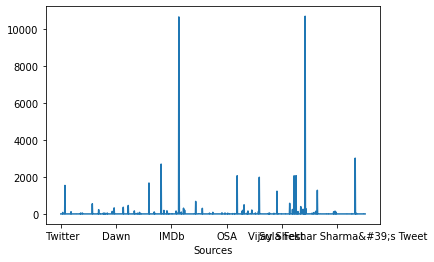

In [14]:
#how many articles per subject
print(df1.groupby(['Sources'])['Headlines'].count())
df1.groupby(['Sources'])['Headlines'].count().plot(kind='line')
plt.show()

label
0    35053
1    21333
Name: Headlines, dtype: int64


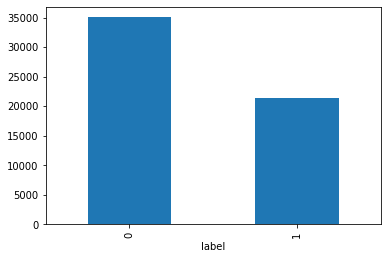

In [15]:
#how many fake and news articles
print(df1.groupby(['label'])['Headlines'].count())
df1.groupby(['label'])['Headlines'].count().plot(kind='bar')
plt.show()

SPLITTING DTA

In [16]:
#separating the data and label
X = df1['Headlines'].values
Y = df1['label'].values

In [17]:
print(X)

['bungalow private island sale 46 crore'
 'americans react bollywood song pinga'
 'world toilet day celebrated november 19' ...
 'pil urges govt form land utilisation policy'
 '1 note likely dispensed atms sbi'
 '77yrold man runs free museum kids b luru']


In [18]:
print(Y)

[0 0 0 ... 0 0 0]


In [19]:
df1.isnull().values.any()

False

In [20]:
df1['label'].isnull().replace(np.nan,0)

0        False
1        False
2        False
3        False
4        False
         ...  
56381    False
56382    False
56383    False
56384    False
56385    False
Name: label, Length: 56386, dtype: bool

In [21]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3 ,stratify=Y, random_state=2)

In [22]:
#converting textual data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english' , max_df=0.4)
tfidf_X_train = vectorizer.fit_transform(X_train)
tfidf_X_test = vectorizer.transform(X_test)
#result=vectorizer.fit_transform(X)

In [23]:
print(tfidf_X_train)

  (0, 3939)	0.4553858787505077
  (0, 2387)	0.33646773001859853
  (0, 22726)	0.48664448166902097
  (0, 21900)	0.39498077526955455
  (0, 25431)	0.40256932805756473
  (0, 16601)	0.3528717044856271
  (1, 28938)	0.39478679791904897
  (1, 5439)	0.40487102137390835
  (1, 12540)	0.29779104705636283
  (1, 25726)	0.5339554990231588
  (1, 4825)	0.39408314676065737
  (1, 31295)	0.3887587054146764
  (2, 19675)	0.35441068476535464
  (2, 6627)	0.40698680350829
  (2, 31543)	0.228093827105234
  (2, 7055)	0.3505149914263675
  (2, 3102)	0.73066220315281
  (3, 3848)	0.35011205490223096
  (3, 9607)	0.44687922198981034
  (3, 15157)	0.3425581055699369
  (3, 6224)	0.3388455542995443
  (3, 4305)	0.4785139164003635
  (3, 21991)	0.46538433194175716
  (4, 22595)	0.4297397427561461
  (4, 14111)	0.3202024618702608
  :	:
  (39466, 15598)	0.5220225282674318
  (39466, 13276)	0.44030511193084026
  (39466, 27554)	0.3990712045614525
  (39466, 28792)	0.4448738230968159
  (39466, 1004)	0.31871374285957965
  (39466, 3707)	0

PASSIVE AGRESSIVE CLASSIFIER

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=30)
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier(max_iter=30)

In [25]:
#accuracy for passive agressive classifier
pred=classifier.predict(tfidf_X_train)
score= accuracy_score(Y_train,pred)
print(f"Accuracy: {round(score*100,2)}%")

Accuracy: 99.97%


In [32]:
#saving the model on pickle module disk
import pickle
pickle.dump(classifier,open('model.pkl','wb'))

In [35]:
#loading model from disk
loaded_model= pickle.load(open('model.pkl','rb'))

MAKING A PREDICTVE SYSTEM

In [36]:
#predictive System
def fake_news_predict(news):
  input=[news]
  vectorized_input=vectorizer.transform(input)
  prediction=loaded_model.predict(vectorized_input)
  print(prediction)
  if (prediction==0):
    print("The News is Real")
  else:
    print("The news is Fake")

In [37]:
fake_news_predict('Entertainment hindi bollywood news is kriti sanons sister seeing this bollywood divas brother ')

[1]
The news is Fake
